# Winter in Toronto Profile(only December for now)

## Need to Prioritize:
- Privacy (time based), blinds not used Mon-Fri from 9am-5pm ✅
- Indoor Temperature (block out light)

## Meaningfull Data: 
- Higher light levels during sunrise to sunset, according to the month ✅
- When blinds are opened, temperature increases by 1 if light level is > 600 ✅
- When blinds are closed, temperature decrease by 0.5 if light level is < 600 ✅
- Blinds are typically used from 6am to 10pm ✅

## TimeandDate.com Reference
- https://www.timeanddate.com/sun/canada/toronto?month=12&year=2021
- https://www.timeanddate.com/weather/canada/toronto/historic?month=12&year=2021

## December 2022:

In [37]:
import pandas as pd
import random
from datetime import datetime

#dictionary
data = {"Light":[],"Temp":[]}
Timedata = {"RTC":[]}

#Days in a month
for day in range(1,31):

    #maximum of 15 blind operations in a day
    samples = random.randint(0,16) 
    
    for x in range(samples):
        #select time range that people would generally use blinds
        #ex: 6am to 10pm
        time_hour = random.randrange(6,23) 
        #values 0 to 50, 10 steps a time
        time_min = random.randrange(0,60,10)
        
        #convert the date times so they can be sorted 
        #account for single hours, add an extra 0 infront
        if time_hour < 10:
            Time00 = "0" + str(time_hour)  
        else:
            Time00 = time_hour

        if day < 10:
            dayDate = "0" + str(day)
        else: 
            dayDate = str(day)

        time = dayDate + "/12/2022 " + str(Time00) + ":" + str(time_min) + ":00"
        
        dateOBJ = datetime.strptime(time, "%d/%m/%Y %H:%M:%S")

        #append the real time clock
        Timedata["RTC"].append(dateOBJ)
        
Timedata_df = pd.DataFrame(Timedata)

#sort the date times
filtered_Timedata = Timedata_df.sort_values('RTC')

#create hour column
filtered_Timedata['hour'] = filtered_Timedata['RTC'].dt.hour

#convert RTC into weekdays
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

filtered_Timedata['WeekDay'] = filtered_Timedata['RTC'].dt.dayofweek.map(dw_mapping)

#convert RTC into numeric weekdays
filtered_Timedata['Day'] = filtered_Timedata['RTC'].dt.dayofweek

filtered_Timedata.reset_index(drop=True, inplace=True)

#Profile prioritization, Privacy (time based), blinds not used Mon-Fri from 9am-5pm 
filtered_Timedata.drop(filtered_Timedata[(filtered_Timedata['Day'] <= 4) & (filtered_Timedata['hour'] >= 9) & (filtered_Timedata['hour'] < 17)].index, inplace=True)

filtered_Timedata.reset_index(drop=True, inplace=True)

#drop duplicate date times
filtered_Timedata = filtered_Timedata.drop_duplicates(subset=['RTC'])

#alternate the state variable accordingly
#0 is rolled down, 1 is rolled up
state = 1
state_array = []

for x in range(len(filtered_Timedata.index)): 
    
    if state == 1:
        state_array.append(state)
        state = 0
    else:
        state_array.append(state)
        state = 1
        
filtered_Timedata.insert(3, "Event", state_array)

#display(filtered_Timedata)

state = 1
for day in range(1,31):
    
    for x in range(samples):
        
        time_hour = filtered_Timedata.iloc[x]['hour']

        #7am to 5 pm sunrise/sunset in the month of December
        #higher light levels during sunrise etc
        if time_hour > 7 and time_hour < 17: 
            light = random.randint(600,650)
        else: 
            light = random.randint(470,599)

        #add the randomly selected times
        data["Light"].append(light)
        
        #Indoor temperatures are affected whether blinds are opened/closed 
        temp = round(random.uniform(20,24),1)
        
        if state == 0:
            state = 1
            if light < 600:
                temp = temp - 0.5
        elif state == 1:
            state = 0
            if light > 600:
                temp = temp + 1
            
        data["Temp"].append(temp)
        
#convert to pandas dataframe
df = pd.DataFrame(data)
result = pd.concat([df, filtered_Timedata], axis=1, join='inner')

#display and convert data to csv file
result['Minutes'] = ((result['RTC'].dt.hour * 60) + result['RTC'].dt.minute)
result['Month'] = result['RTC'].dt.month

for i in range(len(result.index)-2):   
    if (result.iloc[i]['Event'] == 1 and (((result.iloc[i+1]['hour'])-(result.iloc[i]['hour']))>=8)):
        result.drop([i,i+1])
        print(str(i) + " "+ str(i+1))

display(result)
result.to_csv('December2022.csv',index = False)

26 27
32 33
36 37
56 57
60 61
94 95
96 97


,Light,Temp,RTC,hour,WeekDay,Event,Day,Minutes,Month
0,591,23.1,2022-12-01 06:00:00,6,Thursday,1,3,360,12
1,626,22.0,2022-12-01 08:30:00,8,Thursday,0,3,510,12
2,546,21.5,2022-12-01 17:00:00,17,Thursday,1,3,1020,12
3,546,23.1,2022-12-01 17:30:00,17,Thursday,0,3,1050,12
4,549,21.3,2022-12-01 21:50:00,21,Thursday,1,3,1310,12
...,...,...,...,...,...,...,...,...,...
146,585,21.0,2022-12-29 21:10:00,21,Thursday,1,3,1270,12
147,590,21.6,2022-12-30 07:20:00,7,Friday,0,4,440,12
148,528,20.2,2022-12-30 07:50:00,7,Friday,1,4,470,12
149,527,19.5,2022-12-30 08:50:00,8,Friday,0,4,530,12


## January 2023:

In [52]:
import pandas as pd
import random
from datetime import datetime

#dictionary
data = {"Light":[],"Temp":[]}
Timedata = {"RTC":[]}

#Days in a month
for day in range(1,31):

    #maximum of 15 blind operations in a day
    samples = random.randint(0,16) 
    
    for x in range(samples):
        #select time range that people would generally use blinds
        #ex: 6am to 10pm
        time_hour = random.randrange(6,23) 
        #values 0 to 50, 10 steps a time
        time_min = random.randrange(0,60,10)
        
        #convert the date times so they can be sorted 
        #account for single hours, add an extra 0 infront
        if time_hour < 10:
            Time00 = "0" + str(time_hour)  
        else:
            Time00 = time_hour

        if day < 10:
            dayDate = "0" + str(day)
        else: 
            dayDate = str(day)

        time = dayDate + "/01/2023 " + str(Time00) + ":" + str(time_min) + ":00"
        
        dateOBJ = datetime.strptime(time, "%d/%m/%Y %H:%M:%S")

        #append the real time clock
        Timedata["RTC"].append(dateOBJ)
        
Timedata_df = pd.DataFrame(Timedata)

#sort the date times
filtered_Timedata = Timedata_df.sort_values('RTC')

#create hour column
filtered_Timedata['hour'] = filtered_Timedata['RTC'].dt.hour

#convert RTC into weekdays
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

filtered_Timedata['WeekDay'] = filtered_Timedata['RTC'].dt.dayofweek.map(dw_mapping)

#convert RTC into numeric weekdays
filtered_Timedata['Day'] = filtered_Timedata['RTC'].dt.dayofweek

filtered_Timedata.reset_index(drop=True, inplace=True)

#Profile prioritization, Privacy (time based), blinds not used Mon-Fri from 9am-5pm 
filtered_Timedata.drop(filtered_Timedata[(filtered_Timedata['Day'] <= 4) & (filtered_Timedata['hour'] >= 9) & (filtered_Timedata['hour'] < 17)].index, inplace=True)

filtered_Timedata.reset_index(drop=True, inplace=True)

#drop duplicate date times
filtered_Timedata = filtered_Timedata.drop_duplicates(subset=['RTC'])

#alternate the state variable accordingly
#0 is rolled down, 1 is rolled up
state = 0
state_array = []

for x in range(len(filtered_Timedata.index)): 
    
    if state == 1:
        state_array.append(state)
        state = 0
    else:
        state_array.append(state)
        state = 1
        
filtered_Timedata.insert(3, "Event", state_array)

#display(filtered_Timedata)

state = 0
for day in range(1,31):
    
    for x in range(samples):
        
        time_hour = filtered_Timedata.iloc[x]['hour']

        #7am to 6 pm sunrise/sunset in the month of December
        #higher light levels during sunrise etc
        if time_hour > 7 and time_hour < 18: 
            light = random.randint(600,650)
        else: 
            light = random.randint(470,599)

        #add the randomly selected times
        data["Light"].append(light)
        
        #Indoor temperatures are affected whether blinds are opened/closed 
        temp = round(random.uniform(20,24),1)
        
        if state == 0:
            state = 1
            if light < 600:
                temp = temp - 0.5
        elif state == 1:
            state = 0
            if light > 600:
                temp = temp + 1
            
        data["Temp"].append(temp)
        
#convert to pandas dataframe
df = pd.DataFrame(data)
result = pd.concat([df, filtered_Timedata], axis=1, join='inner')

#display and convert data to csv file
result['Minutes'] = ((result['RTC'].dt.hour * 60) + result['RTC'].dt.minute)
result['Month'] = result['RTC'].dt.month

for i in range(len(result.index)-2):   
    if (result.iloc[i]['Event'] == 1 and (((result.iloc[i+1]['hour'])-(result.iloc[i]['hour']))>=8)):
        result.drop([i,i+1])
        print(str(i) + " "+ str(i+1))

display(result)
result.to_csv('January2023.csv',index = False)

15 16
49 50
55 56
67 68
73 74
117 118


,Light,Temp,RTC,hour,WeekDay,Event,Day,Minutes,Month
0,498,22.4,2023-01-01 06:40:00,6,Sunday,0,6,400,1
1,554,23.4,2023-01-01 07:30:00,7,Sunday,1,6,450,1
2,648,23.1,2023-01-01 08:20:00,8,Sunday,0,6,500,1
3,631,22.0,2023-01-01 08:40:00,8,Sunday,1,6,520,1
4,632,21.7,2023-01-01 09:20:00,9,Sunday,0,6,560,1
...,...,...,...,...,...,...,...,...,...
150,631,22.6,2023-01-30 18:30:00,18,Monday,0,0,1110,1
152,637,20.3,2023-01-30 19:20:00,19,Monday,1,0,1160,1
153,615,22.8,2023-01-30 19:40:00,19,Monday,0,0,1180,1
154,641,22.2,2023-01-30 21:10:00,21,Monday,1,0,1270,1


## February

In [50]:
import pandas as pd
import random
from datetime import datetime

#dictionary
data = {"Light":[],"Temp":[]}
Timedata = {"RTC":[]}

#Days in a month
for day in range(1,28):

    #maximum of 10 blind operations in a day
    samples = random.randint(0,16) 
    
    for x in range(samples):
        #select time range that people would generally use blinds
        #ex: 6am to 10pm
        time_hour = random.randrange(6,23) 
        #values 0 to 50, 10 steps a time
        time_min = random.randrange(0,60,10)
        
        #convert the date times so they can be sorted 
        #account for single hours, add an extra 0 infront
        if time_hour < 10:
            Time00 = "0" + str(time_hour)  
        else:
            Time00 = time_hour

        if day < 10:
            dayDate = "0" + str(day)
        else: 
            dayDate = str(day)

        time = dayDate + "/02/2023 " + str(Time00) + ":" + str(time_min) + ":00"
        
        dateOBJ = datetime.strptime(time, "%d/%m/%Y %H:%M:%S")

        #append the real time clock
        Timedata["RTC"].append(dateOBJ)
        
Timedata_df = pd.DataFrame(Timedata)

#sort the date times
filtered_Timedata = Timedata_df.sort_values('RTC')

#create hour column
filtered_Timedata['hour'] = filtered_Timedata['RTC'].dt.hour

#convert RTC into weekdays
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

filtered_Timedata['WeekDay'] = filtered_Timedata['RTC'].dt.dayofweek.map(dw_mapping)

#convert RTC into numeric weekdays
filtered_Timedata['Day'] = filtered_Timedata['RTC'].dt.dayofweek

filtered_Timedata.reset_index(drop=True, inplace=True)

#Profile prioritization, Privacy (time based), blinds not used Mon-Fri from 9am-5pm 
filtered_Timedata.drop(filtered_Timedata[(filtered_Timedata['Day'] <= 4) & (filtered_Timedata['hour'] >= 9) & (filtered_Timedata['hour'] < 17)].index, inplace=True)

filtered_Timedata.reset_index(drop=True, inplace=True)

#drop duplicate date times
filtered_Timedata = filtered_Timedata.drop_duplicates(subset=['RTC'])

#alternate the state variable accordingly
#0 is rolled down, 1 is rolled up
state = 1
state_array = []

for x in range(len(filtered_Timedata.index)): 
    
    if state == 1:
        state_array.append(state)
        state = 0
    else:
        state_array.append(state)
        state = 1
        
filtered_Timedata.insert(3, "Event", state_array)

#display(filtered_Timedata)

state = 1
for day in range(1,28):
    
    for x in range(samples):
        
        time_hour = filtered_Timedata.iloc[x]['hour']

        #7am to 7 pm sunrise/sunset in the month of December
        #higher light levels during sunrise etc
        if time_hour > 7 and time_hour < 19: 
            light = random.randint(600,650)
        else: 
            light = random.randint(470,599)

        #add the randomly selected times
        data["Light"].append(light)
        
        #Indoor temperatures are affected whether blinds are opened/closed 
        temp = round(random.uniform(20,24),1)
        
        if state == 0:
            state = 1
            if light < 600:
                temp = temp - 0.5
        elif state == 1:
            state = 0
            if light > 600:
                temp = temp + 1
            
        data["Temp"].append(temp)
        
#convert to pandas dataframe
df = pd.DataFrame(data)
result = pd.concat([df, filtered_Timedata], axis=1, join='inner')

#display and convert data to csv file
result['Minutes'] = ((result['RTC'].dt.hour * 60) + result['RTC'].dt.minute)
result['Month'] = result['RTC'].dt.month

for i in range(len(result.index)-2):   
    if (result.iloc[i]['Event'] == 1 and (((result.iloc[i+1]['hour'])-(result.iloc[i]['hour']))>=8)):
        result.drop([i,i+1])
        print(str(i) + " "+ str(i+1))

display(result)
result.to_csv('February2023.csv',index = False)

0 1
28 29
46 47
52 53
84 85
108 109


,Light,Temp,RTC,hour,WeekDay,Event,Day,Minutes,Month
0,501,21.3,2023-02-01 07:10:00,7,Wednesday,1,2,430,2
1,621,21.7,2023-02-01 18:10:00,18,Wednesday,0,2,1090,2
2,489,23.5,2023-02-01 19:20:00,19,Wednesday,1,2,1160,2
3,474,20.0,2023-02-01 19:30:00,19,Wednesday,0,2,1170,2
4,472,23.3,2023-02-01 20:00:00,20,Wednesday,1,2,1200,2
...,...,...,...,...,...,...,...,...,...
124,563,20.0,2023-02-27 06:40:00,6,Monday,1,0,400,2
125,478,23.3,2023-02-27 08:20:00,8,Monday,0,0,500,2
126,633,25.0,2023-02-27 19:40:00,19,Monday,1,0,1180,2
127,646,20.2,2023-02-27 20:20:00,20,Monday,0,0,1220,2


## Merging & Uploading to Firebase

In [96]:
import pandas as pd
import random
import numpy as np
from datetime import datetime

#Firebase Libraries
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

#Fetch the service account key JSON file contents
cred = credentials.Certificate("serviceAccountKey.json")

#initialize the app if not already
if not firebase_admin._apps:
    firebase_admin.initialize_app(cred, {
        'databaseURL': 'https://smartyblinds-default-rtdb.firebaseio.com/'
    })
    
SERIAL_NUM = 123

# merging two csv files
df1 = pd.concat(
    map(pd.read_csv, ['December2022.csv','January2023.csv', 'February2023.csv']), ignore_index=True)

df = pd.DataFrame(df1)

df.drop(['WeekDay', 'Day','Minutes','hour','Month'], inplace=True, axis=1)

print(df)

df.to_csv('Datum.csv',index = False)

display(df)

ref = db.reference('Blinds/' + str(SERIAL_NUM) + '/')
ref.update({"Total_Data": np.float64(len(df.index))})



for x in range(len(df.index)-1):   
    ref = db.reference('Blinds/' + str(SERIAL_NUM) + '/Data/' + str(x+1) + '/')
    ref.update({"Light": np.float64(df.iloc[x]['Light'])})
    ref.update({"Temp": np.float64(df.iloc[x]['Temp'])})
    ref.update({"RTC": str(df.iloc[x]['RTC'])})
    ref.update({"Event": np.float64(df.iloc[x]['Event'])})

     Light  Temp                  RTC  Event
0      591  23.1  2022-12-01 06:00:00      1
1      626  22.0  2022-12-01 08:30:00      0
2      546  21.5  2022-12-01 17:00:00      1
3      546  23.1  2022-12-01 17:30:00      0
4      549  21.3  2022-12-01 21:50:00      1
..     ...   ...                  ...    ...
414    563  20.0  2023-02-27 06:40:00      1
415    478  23.3  2023-02-27 08:20:00      0
416    633  25.0  2023-02-27 19:40:00      1
417    646  20.2  2023-02-27 20:20:00      0
418    639  22.8  2023-02-27 22:40:00      1

[419 rows x 4 columns]


,Light,Temp,RTC,Event
0,591,23.1,2022-12-01 06:00:00,1
1,626,22.0,2022-12-01 08:30:00,0
2,546,21.5,2022-12-01 17:00:00,1
3,546,23.1,2022-12-01 17:30:00,0
4,549,21.3,2022-12-01 21:50:00,1
...,...,...,...,...
414,563,20.0,2023-02-27 06:40:00,1
415,478,23.3,2023-02-27 08:20:00,0
416,633,25.0,2023-02-27 19:40:00,1
417,646,20.2,2023-02-27 20:20:00,0


<AxesSubplot: >

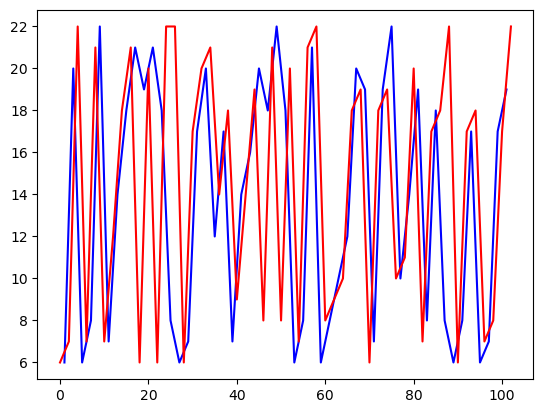

In [100]:
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

gk = df.groupby('Event')
BD = gk.get_group(0)
BU = gk.get_group(1)

BD.to_csv('BD.csv',index = False)
BU.to_csv('BU.csv',index = False)

# display(BD)
# display(BU)

# BD.plot(x="RTC",y="Light")

# plt.show()

# BU.plot(x="RTC",y="Light")





BD['hour'].plot(label='BD', color='blue')
BU['hour'].plot(label='BU', color='red')

# plt.pie(df["Light"], labels=df["Event"])

# plt.show()

Accuracy: 54%
[[550, 20.5, 3, 1500]] [1]


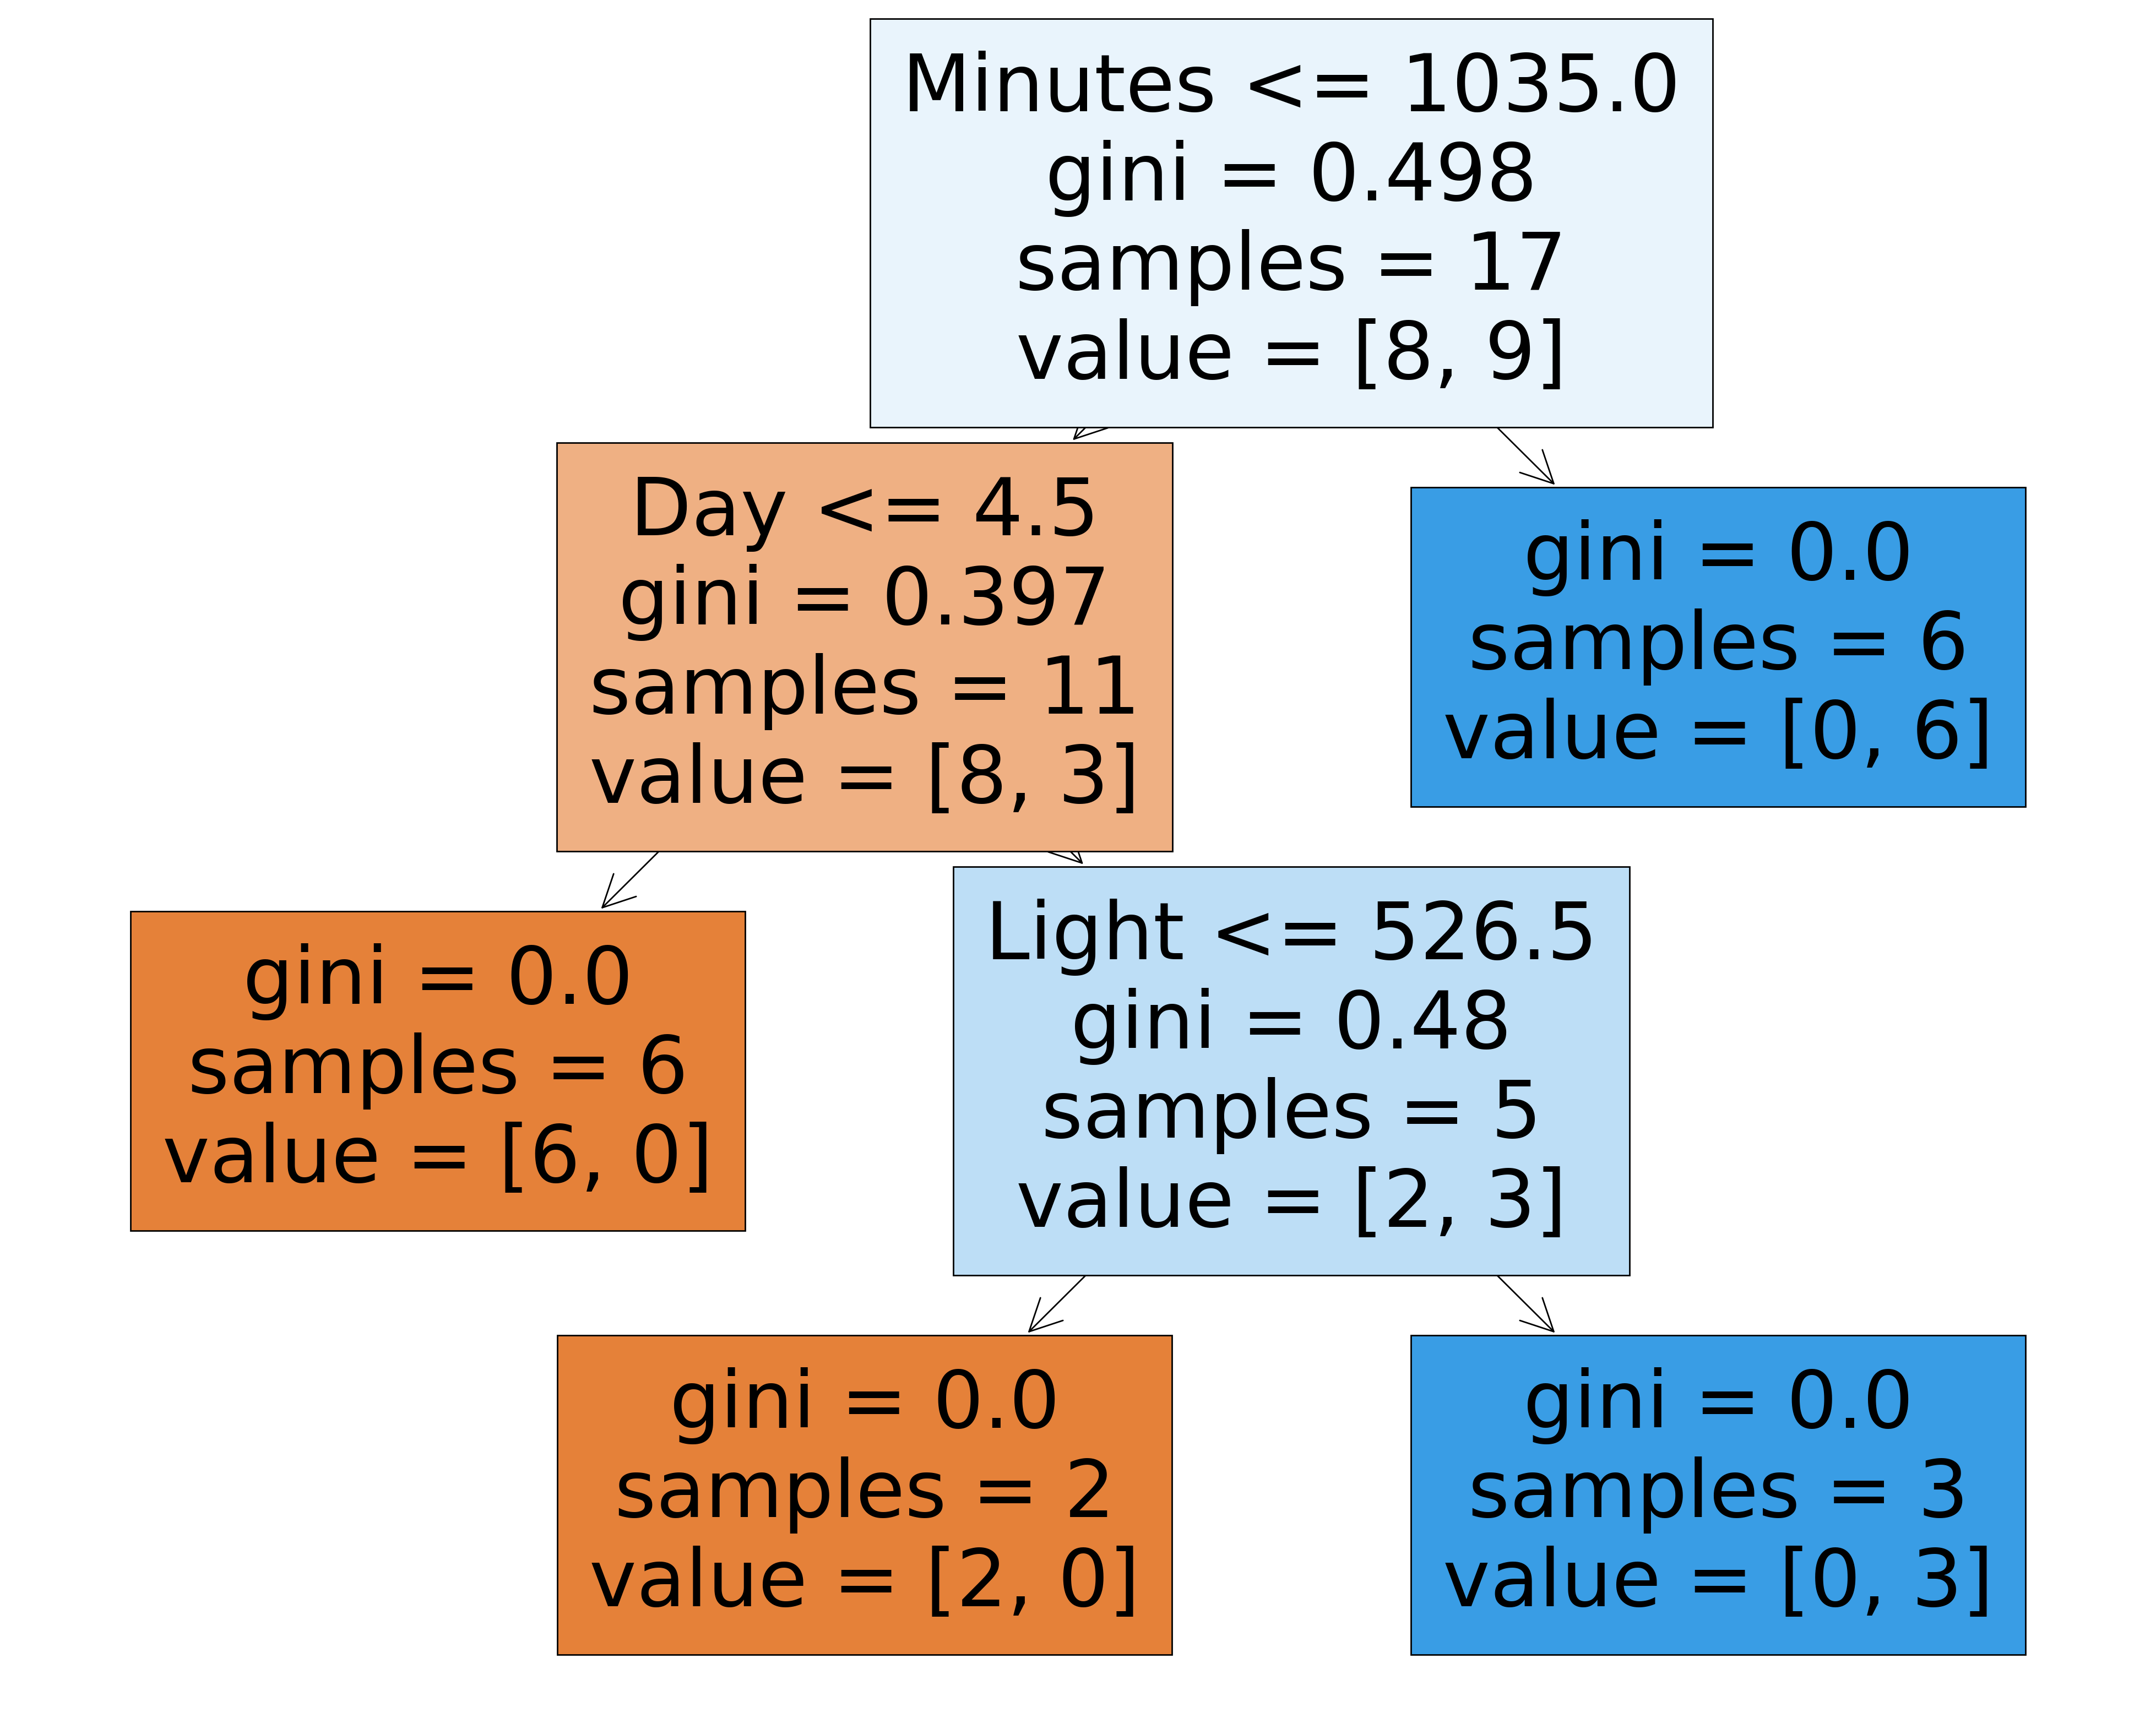

In [65]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

df = pandas.read_csv("data.csv")

#Split dataset in features and target variable
conditions = ['Light', 'Temp', 'Day', 'Minutes']
#conditions = ['Day', 'Minutes']
X = df[conditions].values
y = df.Event

#Split dataset into training set and test set (70% training and 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

#Create Decision Tree classifer object
dtree = DecisionTreeClassifier()

#Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",str(round(metrics.accuracy_score(y_test, y_pred)*100)) + "%")

#Visualizing Decision Trees
fig = plt.figure(figsize=(25,20), dpi=200)
tree.plot_tree(dtree, feature_names=conditions, filled=True)
fig.savefig("decisiontree.png") 

#https://www.datacamp.com/tutorial/decision-tree-classification-python

#https://machinelearningmastery.com/how-to-connect-model-input-data-with-predictions-for-machine-learning/
#https://machinelearningmastery.com/make-predictions-scikit-learn/
example_input = [[550,20.5,3, 1500]]
new_output = dtree.predict(example_input)
print(example_input, new_output)

In [63]:
example_input = [[500, 22.5, 3, 1600]]
new_output = dtree.predict(example_input)
print(example_input, new_output)
print(new_output.item(0))

[[500, 22.5, 3, 1600]] [1]
1


In [1]:
import pandas 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

df = pandas.read_csv("data.csv")

#Split dataset in features and target variable
#conditions = ['Light', 'Temp', 'Day', 'Minutes']
conditions = ['Day', 'Minutes']
X = df[conditions].values
y = df.Event

#Split dataset into training set and test set (70% training and 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create Decision Tree classifer object
dtree = DecisionTreeClassifier()


#Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

In [37]:
example_input = [[3, 1000]]
new_output = dtree.predict(example_input)
print(example_input, new_output)

[[3, 1000]] [0]
